[github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm), mar 2016

<center>
<img width=300 src="./fig/ladisk.png">
<br>
[izr.prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)
<br><br><br>

<font size="10" color="f00e0e" face="garamond"><b>Sistemi linearnih algebrajskih enačb (1)</b></font>

</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn # ta paket lahko odstranite, namenjen je lepšemu izrisu
%matplotlib inline
from sympy import *
init_printing()

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# 1. Uvod

Pod zgornjim naslovom razumemo reševanje enačbe:

$$\mathbf{A}\,\mathbf{x}=\mathbf{b}$$

Viri tega poglavja so predvsem:
* Kiusalaas J: Numerical Methods in Engineering with Python 3, 2013
* Petrišič J.: Uvod v Matlab za inženirje, 2011

kjer sta $\mathbf{A}$ in $\mathbf{b}$ znana matrika in vektor, vektor $\mathbf{x}$ pa ni znan. Matriko $\mathbf{A}$ imenujemo **matrika koeficientov**, vektor $\mathbf{b}$ **vektor konstant** in $\mathbf{x}$ **vektor neznank**.

Opomba glede oblike:
* skalarne spremenljivke pišemo poševno, npr.: $a$,
* vektorske spremenljivke pišemo z majhno črko poudarjeno, npr.: $\mathbf{a}$,
* matrične  spremenljivke pišemo z veliko črko poudarjeno, npr.: $\mathbf{A}$.

Preprosti **simbolni** primer je:

In [2]:
A11, A12, A21, A22 = symbols('A11, A12, A21, A22')
x1, x2 = symbols('x1, x2')
b1, b2 = symbols('b1, b2')
A = Matrix([[A11, A12],
            [A21, A22]])
x = Matrix([[x1],
            [x2]])
b = Matrix([[b1],
            [b2]])

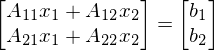

In [3]:
eq = Eq(A*x,b)
eq

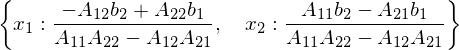

In [4]:
resitev = solve(eq,[x1, x2])
resitev

In [5]:
%%timeit
solve(eq,[x1, x2])

10 loops, best of 3: 54.3 ms per loop


## Enoličnost rešitve

Sistem $n$ linearnih enačb z $n$ neznankami ima enolično rešitev, če determinanta **matrike koeficientov** ni singularna; to pomeni, da $|\mathbf{A}|\neq 0$. V tem primeru so vrstice in stolpci linearno neodvisni; z drugimi besedami nobena vrstica ali stolpec ni linearna kombinacija ostalih vrstc ali stolpcev.

Za naš preprosti primer je determinanta:

In [6]:
A.det()

Če je matrika koeficientov singularna $|\mathbf{A}|=0$, potem ima sistem linearnih enačb neskončno veliko rešitev ali pa rešitve sploh nima (odvisno od vektorja konstant $\mathbf{b}$).

Poglejmo si primer sistema, ko so **enačbe linearno odvisne**:

In [7]:
par1 = {A11: 1, A21: 2, A12: 2, A22: 4, b1: 1, b2: 2}

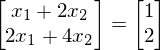

In [8]:
lin_odv = eq.subs(par1)
lin_odv

Ker drugo enačbo dobimo iz prve (z množenjem z 2), ima takšen sistem neskončno rešitev:

In [9]:
solve(lin_odv,[x1, x2])

Preverimo še determinanto:

In [10]:
A.subs(par1).det()

Poglejmo še primer, ko **rešitve sploh ni**:

In [11]:
par2 = {A11: 1, A21: 2, A12: 2, A22: 4, b1: 1, b2: 1}

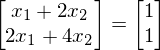

In [12]:
ni_res = eq.subs(par2)
ni_res

In [13]:
solve(ni_res,[x1, x2])

Vidmo, da je rešitev ene enačbe v nasprotju z drugo. Preverimo še determinanto:

In [14]:
A.subs(par2).det()

## Slaba pogojenost matrik

Za enolično rešitev torej želimo nesingularno determinanto matrike koeficientov! Kaj pa se dogaja z rešitvijo, kadar je determinanta $|\mathbf{A}|$ **zelo majhna (relativno blizu nič)**?

Ker gre za relativno oceno, potrebujemo referenco, ki jo tipično poimenujemo **norma** matrike in označimo z $||\textbf{A}||$. 

Za determinanto matrike $\textbf{A}$ rečemo, da je majhna, kadar velja:
$$|\textbf{A}|\ll||\textbf{A}||.$$

Obstaja več načinov merjenja norme, poglejmo si tukaj dve:
* Evklidska norma (tudi Frobeniusova):
$$||\textbf{A}||_e=\sqrt{\sum_{i=1}^n\sum_{j=1}^nA_{ij}^2}$$
* Norma vsote vrstic ali tudi neskončna norma:
$$||\textbf{A}||_{\infty}=\max_{1\le i\le n}\sum_{j=1}^n |A_{ij}|$$

Obstaja pa tudi formalno merilo pogojenosti:
$$\textrm{cond}(||\textbf{A}||)=||\textbf{A}||\,||\textbf{A}^{-1}||.$$

**Če je merilo pogojenosti blizu vrednosti 1, potem govorimo, da je matrika dobro pogojena** in obratno pri slabi pogojenosti se zelo poveča (v primeru singularne matrike proti neskončnosti).

#### Poglejmo kaj se dogaja v naših preprostih primerih:

Najprej slabo pogojen sistem:

In [15]:
par3 = {A11: 1, A21: 1, A12: 1, A22: 1.001, b1: 3, b2: 0.}

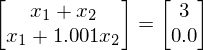

In [16]:
eq.subs(par3)

In [17]:
solve(eq.subs(par3), [x1, x2])

Majhna sprememba matrike koeficientov bo povzročila veliko spremembo rezultata:

In [18]:
par3[A22] = 1.001*par3[A22]
par3

In [19]:
solve(eq.subs(par3), [x1, x2])

In [20]:
np.linalg.cond(np.array(A.subs(par3).tolist(), dtype=float))

Sedaj pa dobro pogojeni sistem

In [21]:
par4 = {A11: 1, A21: 1, A12: 2, A22: 6., b1: 1, b2: 8}

In [22]:
np.linalg.cond(np.array(A.subs(par4).tolist(), dtype=float))

In [23]:
solve(eq.subs(par4))

In [24]:
par4[A22] = 1.001*par4[A22]
solve(eq.subs(par4))

Resnici na ljubo je izračun pogojenosti matrike numerično relativno zahteven (v primeru velih matrik, je inverz zelo zamuden) in zato pogosto *determinanto matrike* primerjamo z *normo* matrike.

## Pristopi k numeričnemu reševanju

Dva v principu različna pristopa k reševanju sistemov linearnih algebrajskih enačb:

A) **Direktni pristop**: nad sistemom enačb izvajamo elementarne operacije, ki ne spreminjajo rešitve, lahko pa spreminjajo vrednost determinante $|\mathbf{A}|$:
   * zamenjava vrstic (spremeni predznak $|\mathbf{A}|$
   * množenje vrstice z nenično konstanto (vrednost determinante  $|\mathbf{A}|$ se pomnoži z isto vrednostjo)
   * odštevanje vrstic (ne spremeni $|\mathbf{A}|$)


B) **Iterativni pristop**: začne iskanje na podlagi začetnega približka, nato pa rešitev iterativno izboljšuje. Iterativne metode so načeloma manj natančne, vendar numerično bolj učinkovite pri velikih in/ali redkih (sparse) matrikah.    

### Pregled direktnih metod

Nekatere najpogosteje uporabljene direktne metode so naštete spodaj. Vse začnejo iz začetnega problema $\mathbf{A}\,\mathbf{x}=\mathbf{b}$, ki ga z elementarnimi operacijami poskušajo preoblikovati v enostavno rešljivo obliko.

|             Metoda          | Končna oblika|
|:---------------------------:|:--------:|
|||
|**Gaussova eliminacija** | $\mathbf{U}\,\mathbf{x}=\mathbf{c}$ |
|**LU razcep (dekompozicija)** | $\mathbf{L}\,\mathbf{U}\,\mathbf{x}=\mathbf{b}$|
|**Gauss-Jordan eliminacija** | $\mathbf{I}\,\mathbf{x}=\mathbf{c}$ |

V zgornji tabel $\mathbf{U}$ predstavlja zgornjo (*upper*) trikotno matriko, $\mathbf{L}$ predstavlja spodnjo (*lower*) trikotno matriko in $\mathbf{I}$ predstavlja enotsko matriko. Matriko imenujemo **trikotna**, če ima na eni strani diagonale samo ničelne člene; kakor bomo videli pozneje, nam taka matrika bistveno poenostavi izračune.

V nadaljevanju si bomo pogledali primer reševanje sistema enačb:

In [25]:
A = np.array([[8, -6, 3],
              [-6, 6, -6],
              [3, -6, 6]], dtype=float) # poskusite tukaj izpustiti dtype=float
                                        # ter preverite rešitev pri Gaussovi elim.
b = np.array([-14, 36, 6])

Ponovimo **simbolno** reševanje:

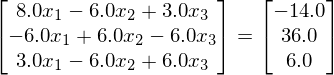

In [26]:
x1, x2, x3 = symbols('x1, x2, x3')
b1, b2, b3 = symbols('b1, b2, b3')
As = Matrix(A)
xs = Matrix([[x1],
             [x2],
             [x3]])
bs = Matrix(np.transpose([b]))
eq = Eq(As * xs, bs)
eq

In [27]:
solve(eq, x1, x2, x3)

Gremo sedaj rešit še numerično, najprej preverimo pogojenost:

In [28]:
np.linalg.cond(A)

Preverimo najprej rešitev z vgrajeno ``numpy`` funkcijo:

In [32]:
x = np.linalg.solve(A,b)
x

array([-14.        , -24.66666667, -16.66666667])

In [33]:
np.dot(A, x)

array([-14.,  36.,   6.])

In [34]:
%timeit np.linalg.solve(A,b)

The slowest run took 10.83 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 13.8 µs per loop


# 2. Gaussova eliminacija

Najprej pripravimo razširjeno matriko koeficientov:
$$\begin{bmatrix}
\mathbf{A}|\mathbf{b}
\end{bmatrix}=
\left[\begin{array}{cccc|c}
A_{11}&A_{12}&\cdots & A_{1n} & b_1\\
A_{21}&A_{22}&\cdots & A_{2n} & b_2\\
\vdots&\vdots&\ddots & \vdots & \vdots\\
A_{n1}&A_{n2}&\cdots & A_{nn} & b_n\\
\end{array}\right]
$$

In [35]:
Ab = np.column_stack((A,b))
Ab

array([[  8.,  -6.,   3., -14.],
       [ -6.,   6.,  -6.,  36.],
       [  3.,  -6.,   6.,   6.]])

In [36]:
(v, s) = Ab.shape
# eliminacija
for p, pivot_vrsta in enumerate(Ab[:-1]):
    for vrsta in Ab[p+1:]:
        if pivot_vrsta[p]:
            vrsta[p:] = vrsta[p:]-pivot_vrsta[p:]*vrsta[p]/pivot_vrsta[p]
    print('Korak: {:g}'.format(p))
    print(Ab)

Korak: 0
[[  8.     -6.      3.    -14.   ]
 [  0.      1.5    -3.75   25.5  ]
 [  0.     -3.75    4.875  11.25 ]]
Korak: 1
[[  8.    -6.     3.   -14.  ]
 [  0.     1.5   -3.75  25.5 ]
 [  0.     0.    -4.5   75.  ]]


Preostane samo še iskanje rešitve (začnemo spodaj):

In [37]:
x = np.zeros(v) # pripravimo prazni seznam

Najprej pogljemo samo določeno vrstico $i$ in delimo $b_i$ z $Ab_{ii}$:

In [38]:
# delno pravilno, da lažje sledimo
for p, pivot_vrsta in enumerate(Ab[::-1]):
    x[v-p-1] = (pivot_vrsta[-1]) / (pivot_vrsta[v-p-1])

In [39]:
x

array([ -1.75      ,  17.        , -16.66666667])

Do določitve $x$ manjka še odštevanje:

In [40]:
for p, pivot_vrsta in enumerate(Ab[::-1]):
    x[v-p-1] = (pivot_vrsta[-1] - np.dot(pivot_vrsta[v-p:-1], x[v-p:]) ) / (pivot_vrsta[v-p-1])

In [41]:
x

array([-14.        , -24.66666667, -16.66666667])

### Numerična zahtevnost

Numerično zahtevnost ocenjujemo po številu matematičnih operacij, ki so potrebne za izračun. 
Za rešitev $n$ linearnih enačb tako z Gaussovo eliminacijo potrebujemo približno $n^3/3$ matematičnih operacij. Za določitev neznank $\mathbf{x}$ potrebujemo še dodatnih približno $n^2$ operacij.

Pri Gaussovi eliminaciji smo eliminacijo izvedli samo za člene pod diagonalo; če bi z eliminacijo nadaljevali in jo izvedli tudi za člene nad diagonalo, bi izvedli t.i. *Gauss-Jordanovo* eliminacijo za katero pa potrebujemo približno $n^3/3$ operacij* (kar se šteje kot glavna slabost te metode).

\* Nekaj komentarjev na temo števila numeričnih operacij najdete tukaj: [pinm.ladisk.si](http://pinm.ladisk.si/303/kako-dolo%C4%8Damo-numeri%C4%8Dno-zahtevnost-algoritmov).

### Povzetek Gaussove eliminacije

V ``orodja.py`` shranimo funkcije:

In [ ]:
def gaussova_eliminacija(A, b, prikazi_korake = False):
    Ab = np.column_stack(A, b)
    for p, pivot_vrsta in enumerate(Ab[:-1]):
        for vrsta in Ab[p+1:]:
            if pivot_vrsta[p]:
                vrsta[p:] = vrsta[p:]-pivot_vrsta[p:]*vrsta[p]/pivot_vrsta[p]
        if prikazi_korake:
            print('Korak: {:g}'.format(p))
            print(Ab)
    return Ab
def gaussova_el_resitev(Ab):
    v = len(Ab)
    x = zeros(v)
    for p, pivot_vrsta in enumerate(Ab[::-1]):
        x[v-p-1] = (pivot_vrsta[-1] - dot(pivot_vrsta[v-p:-1], x[v-p:]) ) / (pivot_vrsta[v-p-1])
    return v

# 3. LU razcep

Kakor smo že zgoraj omenili, pri LU razcepu želimo matriko $\mathbf{A}$ zapisati kot:
$$\mathbf{A}=\mathbf{L}\,\mathbf{U},$$

kjer je $\mathbf{L}$ spodnja trikotna, $\mathbf{U}$ pa zgornja trikotna matrika. Tako definiran LU razcep pa ni enolično določen; za enoličnost, ga je potrebno dodatno omejiti. Tri najpogostejši LU razcepi so:

| Razcep| Omejitve|
|:-----:|:----:|
| | |
|Doolittle| $L_{ii}=1$|
|Crout|$U_{ii}=1$|
|Choleski| $\mathbf{L}=\mathbf{U}^{T}$|

## Doolittle razcep

Če namesto: 
$$\mathbf{A}\mathbf{x}=\mathbf{b}$$
rešujemo:
$$\mathbf{L}\underbrace{\mathbf{U}\mathbf{x}}_{\mathbf{y}}=\mathbf{b},$$
oziroma najprej:
$$\mathbf{L}\,\mathbf{y}=\mathbf{b}.$$
 
Do rešitve pridemo v treh korakih:
1. določimo matriki $\mathbf{L}$ in $\mathbf{U}$,
* iz $\mathbf{L}\,\mathbf{y}=\mathbf{b}$ določimo $\mathbf{y}$,
* iz $\mathbf{U}\,\mathbf{x}=\mathbf{y}$ določimo $\mathbf{x}$.

### Teoretično ozadje

Doolittle razcep si bomo pogledali na preprostem primeru in ugotovili, da je zelo povezan z *Gaussovo* eliminacijo.

Izpeljavo začnimo na primeru simbolno zapisanih matrik $\mathbf{L}$ in $\mathbf{U}$:

In [42]:
L21, L31, L32 = symbols('L21, L31, L32')
U11, U12, U13, U22, U23, U33 = symbols('U11, U12, U13, U22, U23, U33')
L = Matrix([[  1,   0,  0],
            [L21,   1,  0],
            [L31, L32,  1]])
U = Matrix([[U11, U12, U13],
            [  0, U22, U23],
            [  0,   0, U33]])

Splošna matrika koeficientov zapisana z $\mathbf{L}$ in  $\mathbf{U}$ torej je:

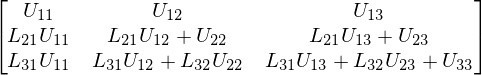

In [43]:
A = L*U
A

S pomočjo prve vrstice izvedimo sedaj Gaussovo eliminacijo druge in tretje; najprej si pripravimo matriko:

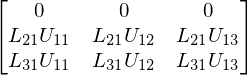

In [46]:
B = Matrix([0*A[0,:],
          L21*A[0,:],
          L31*A[0,:]])
B

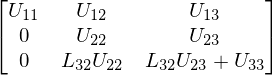

In [47]:
A1 = A-B
A1

Nadaljujemo z eliminacijo:

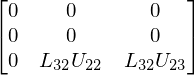

In [48]:
B = Matrix([0*A1[1,:],
            0*A1[1,:],
          L32*A1[1,:]])
B

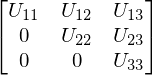

In [49]:
A2 = A1 - B
A2

Iz zgornje eliminacije ugotovimo:
1. matrika $\mathbf{U}$ je enaka matriki, ki jo dobimo, če izvedemo Gaussovo eliminacijo nad matriko koeficientov $\mathbf{A}$.
* izven diagonalni členi $\mathbf{L}$ predstavljajo vrednosti, ki smo jih uporabili pri Gaussovi eliminaciji.

Poglejmo si na primeru:

In [50]:
A = np.array([[8, -6, 3],
              [-6, 6, -6],
              [3, -6, 6]], dtype=float) 
b = np.array([-14, 36, 6], dtype=float)

In [51]:
(v, s) = A.shape
U = A.copy() 
L = np.zeros_like(A)
# eliminacija
for p, pivot_vrsta in enumerate(U[:-1]):
    for i, vrsta in enumerate(U[p+1:]):
        if pivot_vrsta[p]:
            m = vrsta[p]/pivot_vrsta[p]
            vrsta[p:] = vrsta[p:]-pivot_vrsta[p:]*m
            L[p+1+i, p] = m
    print('Korak: {:g}'.format(p))
    print(U)

Korak: 0
[[ 8.    -6.     3.   ]
 [ 0.     1.5   -3.75 ]
 [ 0.    -3.75   4.875]]
Korak: 1
[[ 8.   -6.    3.  ]
 [ 0.    1.5  -3.75]
 [ 0.    0.   -4.5 ]]


In [52]:
L

array([[ 0.   ,  0.   ,  0.   ],
       [-0.75 ,  0.   ,  0.   ],
       [ 0.375, -2.5  ,  0.   ]])

Dopolnimo $\mathbf{L}$:

In [53]:
for i in range(v):
    L[i, i] = 1.

In [54]:
L

array([[ 1.   ,  0.   ,  0.   ],
       [-0.75 ,  1.   ,  0.   ],
       [ 0.375, -2.5  ,  1.   ]])

In [55]:
b

array([-14.,  36.,   6.])

Sedaj lahko rešimo sistem enačb $\mathbf{L}\,\mathbf{y}=\mathbf{b}$:

In [56]:
# delna rešitev za lažje sledenje
y = np.zeros_like(b, )
for i, b_ in enumerate(b):
    y[i] = b_# / L[i, i]     

In [57]:
y

array([-14.,  36.,   6.])

In [58]:
y = np.zeros_like(b)
for i, b_ in enumerate(b):
    y[i] = (b_ - np.dot(L[i, :i], y[:i]))    

In [59]:
y

array([-14. ,  25.5,  75. ])

Nadaljujemo z reševanjem $\mathbf{U}\,\mathbf{x}=\mathbf{y}$:

In [60]:
U

array([[ 8.  , -6.  ,  3.  ],
       [ 0.  ,  1.5 , -3.75],
       [ 0.  ,  0.  , -4.5 ]])

In [61]:
y

array([-14. ,  25.5,  75. ])

Spet gremo po korakih, najprej delno pravilno:

In [62]:
x = np.zeros_like(y)
for i in range(v-1, -1,-1):
    print(i)
    x[i] = y[i] / U[i, i]
x

2
1
0


array([ -1.75      ,  17.        , -16.66666667])

In [63]:
x = np.zeros_like(b)
for i in range(v-1, -1,-1):
    x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
x

array([-14.        , -24.66666667, -16.66666667])

### LU razcep povzetek

Opomba: naslednjič si bomo pogledali pivotiranje, ki lahko bistveno izboljša stabilnost.

V spodnjem zapisu v spominski prostor matrike $\mathbf{A}$ zapišemo tako $\mathbf{L}$, kot $\mathbf{U}$ matriko; to zapišemo takole $[\mathbf{L}\backslash \mathbf{U}]$

In [64]:
def LU_razcep(A):
    """ Vrne razcep A  kot ``[L\\U]`` """
    # eliminacija
    for p, pivot_vrsta in enumerate(A[:-1]):
        for i, vrsta in enumerate(A[p+1:]):
            if pivot_vrsta[p]!=0:
                m = vrsta[p]/pivot_vrsta[p]
                vrsta[p:] = vrsta[p:]-pivot_vrsta[p:]*m
                vrsta[p] = m
    return A

In [65]:
def LU_resitev(LU, b):
    """ Vrne vrednost x glede na ``[L\\U]x=b`` """
    y = np.zeros_like(b)
    x = np.zeros_like(b)
    for i, b_ in enumerate(b):
        y[i] = (b_ - np.dot(LU[i, :i], y[:i])) 
    v = len(b)
    for i in range(v-1, -1,-1):
        x[i] = (y[i] - np.dot(LU[i, i+1:], x[i+1:])) / LU[i, i]
    return x

Obe funkciji shranimo v ``orodja.py``.

### Uporaba in zaključki

Poglejmo si kratek zgled

In [66]:
import moduli.orodja as orodja

In [67]:
A = np.array([[8, -6, 3],
              [-6, 6, -6],
              [3, -6, 6]], dtype=float) # poskusite tukaj izpustiti dtype=float in 
b = np.array([-14, 36, 6], dtype=float)

In [68]:
LU = orodja.LU_razcep(A.copy())

In [69]:
LU

array([[ 8.   , -6.   ,  3.   ],
       [-0.75 ,  1.5  , -3.75 ],
       [ 0.375, -2.5  , -4.5  ]])

In [70]:
x = orodja.LU_resitev(LU, b)

In [71]:
x

array([-14.        , -24.66666667, -16.66666667])

Pomembna **prednost** LU razcepa je, da v kolikor se vektor konstant spremeni, ni potrebno ponovno izvesti samega razcepa. Primer:

In [72]:
b2 = np.array([-1., 6., 7.])
x2 = orodja.LU_resitev(LU, b2)
x2

array([-4.33333333, -7.88888889, -4.55555556])

In [73]:
A.dot(x2)

array([-1.,  6.,  7.])

# Do naslednjih vaj preštudirajte sledeče:

1. Sistem enačb: 
    $$
    \mathbf{A}=
    \begin{bmatrix}
    1 & -4 & 1\\
    1 & 6 & -1\\
    2 & -1 & 2
    \end{bmatrix}
    \qquad
    \mathbf{b}=
    \begin{bmatrix}
    7\\
    13\\
    5
    \end{bmatrix}
    $$

    najdite rešitev s pomočjo ``SymPy``.

* Za zgoraj definirano matriko $\mathbf{A}$ določite Evklidsko normo (lastni program).
* Za zgoraj definirano matriko $\mathbf{A}$ določite neskončno normo (lastni program).
* Za zgoraj definirano matriko $\mathbf{A}$ določite pogojenost (``numpy`` funkcija).
* Definirajte funkcijo ``gauss_elim``, ki za poljubno matriko $\mathbf{A}$ in vektor $\mathbf{b}$ izvede Gaussovo eliminacijo (posebej za matriko in posebej za vektor).
* Definirajte funkcijo ``gauss_elim_x``, ki za razultat funkcije ``gaus_elim`` najde ustrezne vrednosti vektorja $\textbf{x}$.
* Zgornji funkciji dopolnite s štetjem matematičnih operacij.
* Definirajte in pojasnite funkcijo ``LU_razcep``, ki za poljubno matriko izvede LU razcep.
* Definirajte in pojasnite funkcijo ``LU_resitev``, ki za podani LU razcep in vektor konstant poda rešitev.
* Na sliki je prikazan sistem mas:

    <img width=600 src="./fig/mase na klancu.png">
    
    Predpostavite, da se sistem zaradi teže giblje po klancu navzdol z neznanim pospeškom $a$ in da so vrvi napete z neznanimi silami $F_i$. Znane veličine so (sami jih določite): posamično telo ima maso $m_i$, koeficient trenja s podlago $\mu_i=1$, $g=9,81$m/s$^2$, $\varphi=55^{\circ}$.
    Določite sistem enačb v primeru dveh teles. Določite matriko koeficientov $\mathbf{A}$, in vektorja $\mathbf{b}$ ter $\mathbf{x}$.
* Za zgoraj definiran sistem mas predpostavite, da je mas 4 (ali več) ter določite matriko koeficientov $\mathbf{A}$, in vektorja $\mathbf{x}$ ter $\mathbf{b}$. Rešite sistem s pomočjo Gaussove elimnacije/LU razcepa ali ``numpy.linalg.solve``. Preverite pogojenost!
* V sistemu mas dobimo nekonsistentno rešitev, če imamo v kateri od vrvi tlačno silo (vrv ne prenese tlačne sile). Preverite ali je to v vašem primeru res. Ustrezno spremenite koeficient(e) trenja, da se bo to zgodilo.

Delno rešene vaje se nahajajo [tukaj](./vaje/Vaja 5 - polovica.ipynb).

# Ekstra

Poglejte si strani:
* [micropython.org](http://www.micropython.org)
* [kivy.org](http://www.kivy.org)
* [openmodal.com](http://www.openmodal.com)